In [198]:
# Importing the required libraries

from numpy import sqrt, pi, cos, exp, e
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import rand
from numpy.random import seed

from numpy import arange
from numpy import asarray
from numpy import meshgrid

Ackley Function

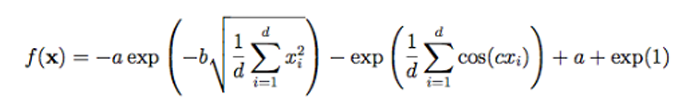

In [199]:
# Defining the Ackley function with the given values


def objective(x, y):
    a = 20
    b = 0.2
    c = 2 * pi
    d = 2
    return (
        (-1 * a) * exp((-1 * b) * sqrt((1 / d) * (x**2 + y**2)))
        - exp((1 / d) * (cos(c * x) + cos(c * y)))
        + a
        + e
    )

In [200]:
# The gradient of the Ackley function using numerical differentiation


def derivative(x, y):
    h = 1e-5
    gradient_x = (objective(x + h, y) - objective(x, y)) / h
    gradient_y = (objective(x, y + h) - objective(x, y)) / h
    return asarray([gradient_x, gradient_y])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4484\717823437.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection="3d")


Text(0.5, 0.92, 'Surface Plot of Ackley Function')

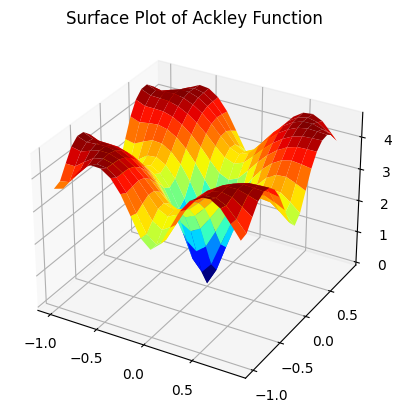

In [201]:
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = plt.figure()
axis = figure.gca(projection="3d")
axis.plot_surface(x, y, results, cmap="jet")
axis.set_title("Surface Plot of Ackley Function")

Text(0.5, 0.92, 'Contour Plot of Ackley Function')

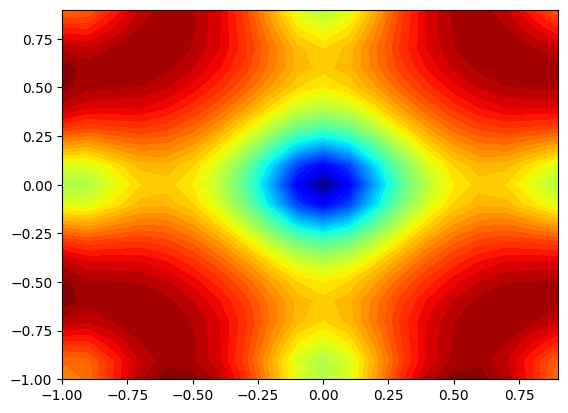

In [202]:
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0, 0], bounds[0, 1], 0.1)
yaxis = arange(bounds[1, 0], bounds[1, 1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap="jet")
axis.set_title("Contour Plot of Ackley Function")

In [203]:
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    solutions = []
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    scores = []
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(bounds.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i] ** 2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1 ** (t + 1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2 ** (t + 1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x[0], x[1])
        # keep track of solutions
        solutions.append(x.copy())
        scores.append(score)

        # report progress
        print(">%d f(%s) = %.5f" % (t, x, score))
    return x, scores, solutions

In [204]:
# seed the pseudo random number generator
seed(1)

# define the total iterations
n_iter = 1000

# steps size
alpha = 1e-3
# factor for average gradient
beta1 = 0.01
# factor for average squared gradient
beta2 = 0.02

# perform the gradient descent search with adam
adam_best, adam_scores, adam_solutions = adam(
    objective, derivative, bounds, n_iter, alpha, beta1, beta2
)

>0 f([-0.16495599  0.43964899]) = 3.19259
>1 f([-0.163956    0.43864893]) = 3.18604
>2 f([-0.16295601  0.43764887]) = 3.17947
>3 f([-0.16195602  0.43664881]) = 3.17288
>4 f([-0.16095603  0.43564875]) = 3.16628
>5 f([-0.15995604  0.43464869]) = 3.15966
>6 f([-0.15895605  0.43364863]) = 3.15302
>7 f([-0.15795606  0.43264857]) = 3.14636
>8 f([-0.15695607  0.43164851]) = 3.13969
>9 f([-0.15595608  0.43064845]) = 3.13300
>10 f([-0.15495609  0.42964839]) = 3.12629
>11 f([-0.15395611  0.42864833]) = 3.11957
>12 f([-0.15295612  0.42764827]) = 3.11282
>13 f([-0.15195613  0.42664821]) = 3.10606
>14 f([-0.15095615  0.42564815]) = 3.09929
>15 f([-0.14995616  0.42464809]) = 3.09249
>16 f([-0.14895618  0.42364804]) = 3.08568
>17 f([-0.14795619  0.42264798]) = 3.07885
>18 f([-0.14695621  0.42164792]) = 3.07201
>19 f([-0.14595622  0.42064786]) = 3.06514
>20 f([-0.14495624  0.4196478 ]) = 3.05826
>21 f([-0.14395626  0.41864774]) = 3.05137
>22 f([-0.14295628  0.41764768]) = 3.04445
>23 f([-0.14195629  0

#ADAN IMPLEMENTATION

In [205]:
def adan(
    objective, derivative, bounds, n_iter, alpha, beta1, beta2, beta3, decay, eps=1e-8
):
    adan_solutions = []
    scores = []
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    n = [0.0 for _ in range(bounds.shape[0])]
    eta = [alpha for _ in range(bounds.shape[0])]
    prev_grad = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(bounds.shape[0]):
            m[i] = (1 - beta1) * m[i] + (beta1) * g[i]
            v[i] = (1 - beta2) * v[i] + beta2 * (g[i] - prev_grad[i])
            n[i] = (1 - beta3) * n[i] + beta3 * (
                (g[i] + ((1 - beta2) * ((g[i] - prev_grad[i])))) ** 2
            )
            correct_n = n[i] * (1 - (1 - beta3) ** (t + 1))
            correct_m = m[i] * (1 - (1 - beta1) ** (t + 1))
            correct_v = v[i] * (1 - (1 - beta2) ** (t + 1))

            eta[i] = alpha / (sqrt(correct_n) + eps)
            x[i] = (x[i] - (eta[i] * (correct_m + ((1 - beta2) * correct_v)))) / (
                1 + (decay * alpha)
            )
        # evaluate candidate point
        score = objective(x[0], x[1])
        # keep track of solutions
        adan_solutions.append(x.copy())
        scores.append(score)
        prev_grad = g
        # report progress
        print(">%d f(%s) = %.5f" % (t, x, score))
    return x, scores, adan_solutions

In [206]:
# seed the pseudo random number generator
seed(1)

# define the total iterations
n_iter = 1000
# steps size
alpha = 1e-3
# factor for average gradient
beta1 = 0.02
# factor for average squared gradient
beta2 = 0.01
# perform the gradient descent search with adam
beta3 = 0.01
decay = 0.9

adan_best, adan_scores, adan_solutions = adan(
    objective, derivative, bounds, n_iter, alpha, beta1, beta2, beta3, decay
)

>0 f([-0.16578171  0.44022771]) = 3.19715
>1 f([-0.16557634  0.43977554]) = 3.19496
>2 f([-0.16533782  0.43929041]) = 3.19256
>3 f([-0.16506562  0.43877181]) = 3.18993
>4 f([-0.16475993  0.43821988]) = 3.18707
>5 f([-0.16442121  0.43763512]) = 3.18400
>6 f([-0.16405013  0.43701817]) = 3.18070
>7 f([-0.16364744  0.43636978]) = 3.17719
>8 f([-0.16321394  0.43569075]) = 3.17347
>9 f([-0.16275047  0.43498191]) = 3.16954
>10 f([-0.16225785  0.43424409]) = 3.16541
>11 f([-0.16173695  0.43347814]) = 3.16108
>12 f([-0.16118858  0.43268486]) = 3.15656
>13 f([-0.16061356  0.4318651 ]) = 3.15184
>14 f([-0.16001272  0.43101964]) = 3.14695
>15 f([-0.15938685  0.43014928]) = 3.14187
>16 f([-0.15873672  0.42925479]) = 3.13661
>17 f([-0.1580631   0.42833692]) = 3.13118
>18 f([-0.15736672  0.42739641]) = 3.12558
>19 f([-0.15664833  0.42643397]) = 3.11982
>20 f([-0.15590862  0.42545031]) = 3.11389
>21 f([-0.15514829  0.42444611]) = 3.10780
>22 f([-0.15436801  0.42342204]) = 3.10156
>23 f([-0.15356843  0

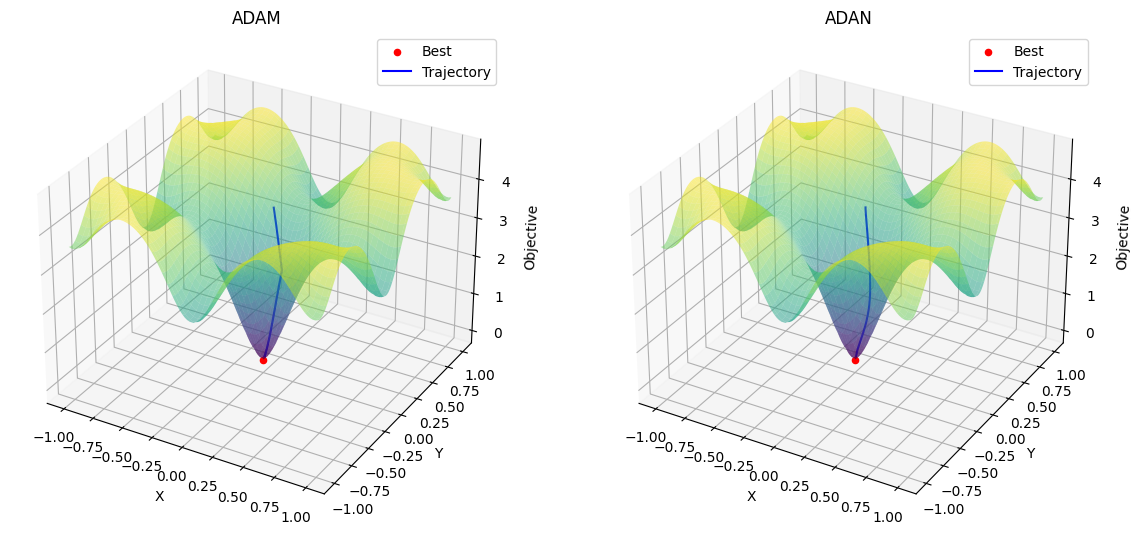

In [207]:
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)

# Plot the optimization trajectory
fig, axes = plt.subplots(1, 2, figsize=(14, 14), subplot_kw={"projection": "3d"})
ax1 = axes[0]
ax1.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)
ax1.scatter(
    adam_best[0],
    adam_best[1],
    objective(adam_best[0], adam_best[1]),
    color="red",
    label="Best",
)
ax1.plot(
    [point[0] for point in adam_solutions],
    [point[1] for point in adam_solutions],
    adam_scores,
    color="blue",
    label="Trajectory",
)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Objective")
ax1.set_title("ADAM")
ax1.legend()


# Plot the optimization trajectory
ax2 = axes[1]

ax2.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)

ax2.scatter(
    adan_best[0],
    adan_best[1],
    objective(adan_best[0], adan_best[1]),
    color="red",
    label="Best",
)

ax2.plot(
    [point[0] for point in adan_solutions],
    [point[1] for point in adan_solutions],
    adan_scores,
    color="blue",
    label="Trajectory",
)

ax2.set_xlabel("X")

ax2.set_ylabel("Y")

ax2.set_zlabel("Objective")
ax2.set_title("ADAN")

ax2.legend()

Text(0.5, 1.0, 'ADAN')

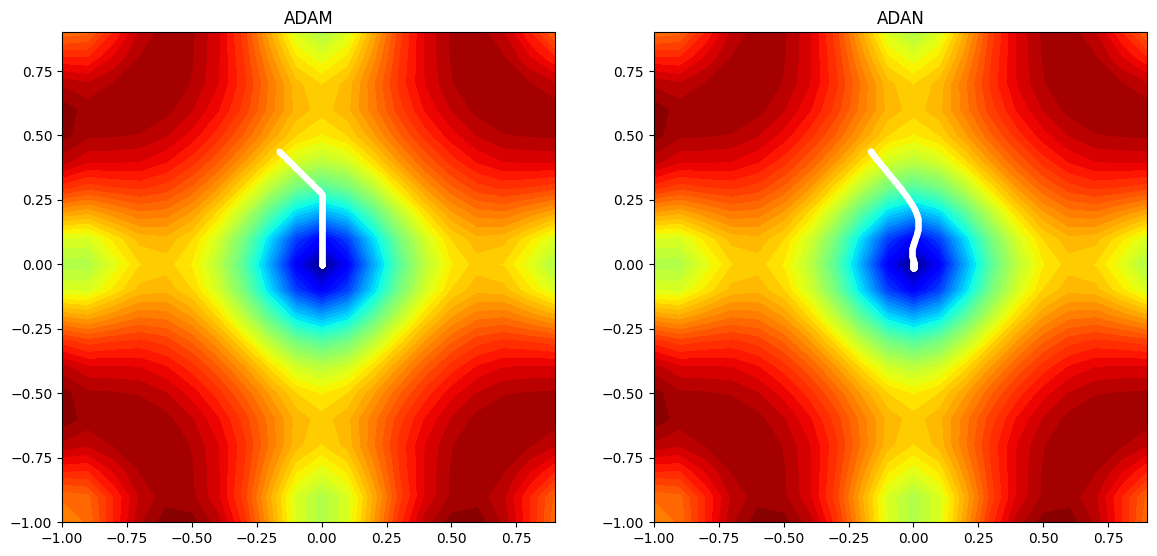

In [208]:
xaxis = arange(bounds[0, 0], bounds[0, 1], 0.1)
yaxis = arange(bounds[1, 0], bounds[1, 1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)

plt.subplots(figsize=(14, 14))
plt.subplot(2, 2, 1)

# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap="jet")
# plot the sample as black circles
adam_solutions = asarray(adam_solutions)
plt.plot(adam_solutions[:, 0], adam_solutions[:, 1], ".-", color="w")
plt.title("ADAM")

plt.subplot(2, 2, 2)
# create a filled contour plot with 50 levels and jet color scheme

plt.contourf(x, y, results, levels=50, cmap="jet")

# plot the sample as black circles

adan_solutions = asarray(adan_solutions)

plt.plot(adan_solutions[:, 0], adan_solutions[:, 1], ".-", color="w")
plt.title("ADAN")

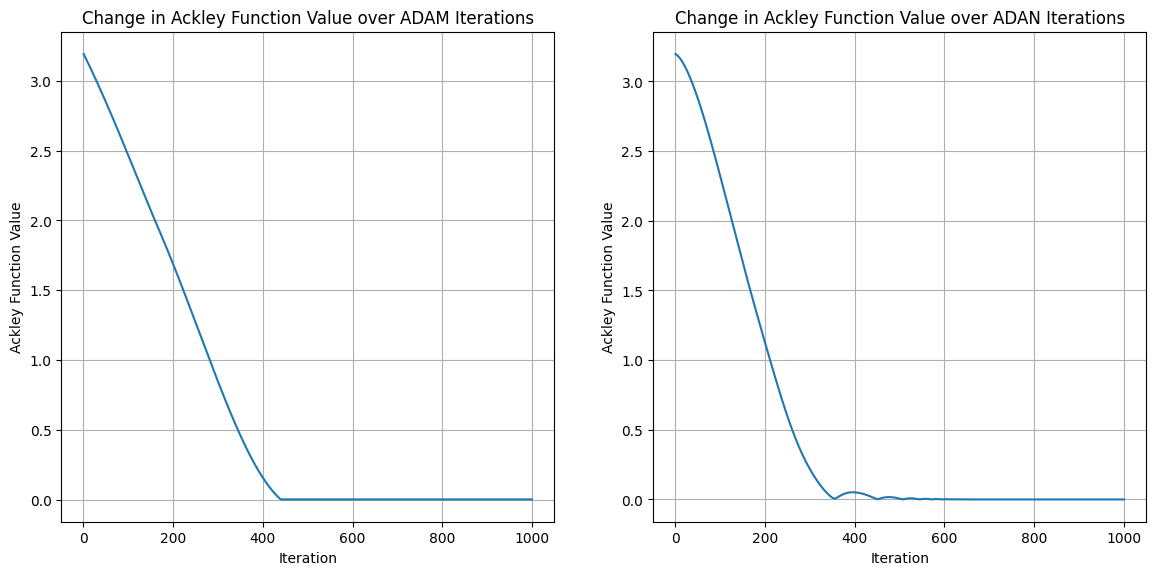

In [209]:
plt.subplots(figsize=(14, 14))
plt.subplot(2, 2, 1)
vals = []
for i in range(1000):
    vals.append(objective(adam_solutions[i][0], adam_solutions[i][1]))
plt.plot(range(1, 1001), vals)
plt.xlabel("Iteration")
plt.ylabel("Ackley Function Value")
plt.title("Change in Ackley Function Value over ADAM Iterations")
plt.grid(True)

plt.subplot(2, 2, 2)
vals = []

for i in range(1000):

    vals.append(objective(adan_solutions[i][0], adan_solutions[i][1]))
plt.plot(range(1, 1001), vals)

plt.xlabel("Iteration")

plt.ylabel("Ackley Function Value")

plt.title("Change in Ackley Function Value over ADAN Iterations")

plt.grid(True)

# Comparison between ADAM and ADAN

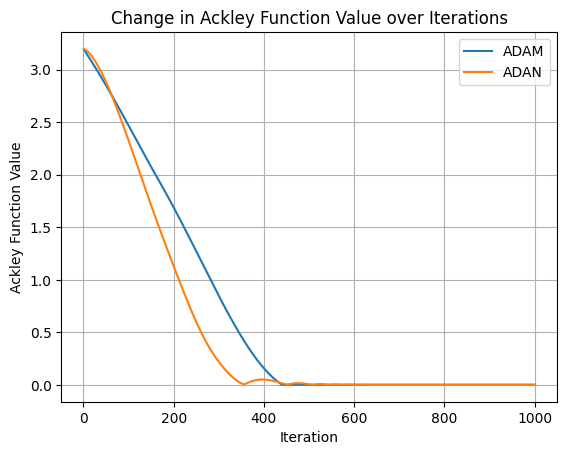

In [210]:
vals = []
for i in range(1000):
    vals.append(objective(adam_solutions[i][0], adam_solutions[i][1]))
plt.plot(range(1, 1001), vals, label="ADAM")

vals = []
for i in range(1000):
    vals.append(objective(adan_solutions[i][0], adan_solutions[i][1]))
plt.plot(range(1, 1001), vals, label="ADAN")

plt.xlabel("Iteration")
plt.ylabel("Ackley Function Value")
plt.title("Change in Ackley Function Value over Iterations")
plt.grid(True)
plt.legend()

# For multiple minima condition

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4484\975671429.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection="3d")


Text(0.5, 0.92, 'Surface Plot of Ackley Function')

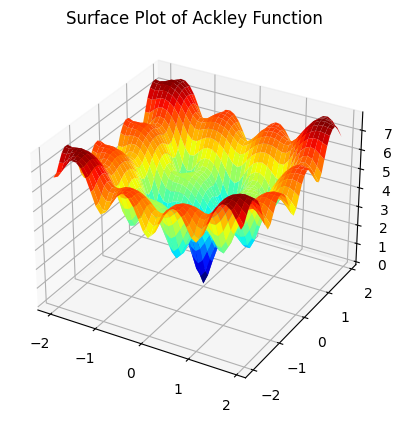

In [211]:
r_min, r_max = -2.0, 2.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = plt.figure()
axis = figure.gca(projection="3d")
axis.plot_surface(x, y, results, cmap="jet")
axis.set_title("Surface Plot of Ackley Function")

Text(0.5, 0.92, 'Contour Plot of Ackley Function')

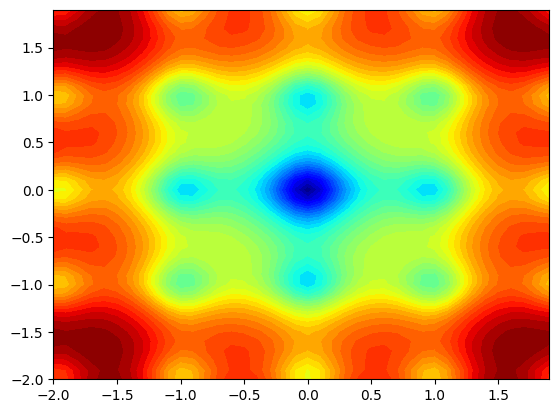

In [212]:
# define range for input
bounds = asarray([[-2.0, 2.0], [-2.0, 2.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0, 0], bounds[0, 1], 0.1)
yaxis = arange(bounds[1, 0], bounds[1, 1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap="jet")
axis.set_title("Contour Plot of Ackley Function")

In [213]:
seed(1)
# define the total iterations
n_iter = 1000

# steps size
alpha = 0.1
# factor for average gradient
beta1 = 0.01
# factor for average squared gradient
beta2 = 0.02

# perform the gradient descent search with adam
adam_best, adam_scores, adam_solutions = adam(
    objective, derivative, bounds, n_iter, alpha, beta1, beta2
)

>0 f([-0.23191198  0.98129796]) = 3.63735
>1 f([-0.13169278  0.88135669]) = 3.06105
>2 f([-0.03189988  0.97954635]) = 2.62666
>3 f([0.06323636 0.88261817]) = 2.77496
>4 f([-0.03575571  0.98169415]) = 2.63692
>5 f([0.06054546 0.88563961]) = 2.76004
>6 f([-0.03830662  0.98456926]) = 2.64662
>7 f([0.05851797 0.88784933]) = 2.74925
>8 f([-0.04017508  0.98659374]) = 2.65407
>9 f([0.05697874 0.8894906 ]) = 2.74130
>10 f([-0.04158509  0.98808992]) = 2.65989
>11 f([0.05579107 0.89074014]) = 2.73530
>12 f([-0.0426672   0.98922353]) = 2.66449
>13 f([0.05486627 0.89170436]) = 2.73072
>14 f([-0.04350585  0.99009453]) = 2.66812
>15 f([0.05414232 0.89245426]) = 2.72717
>16 f([-0.04415973  0.99076946]) = 2.67100
>17 f([0.05357383 0.8930403 ]) = 2.72442
>18 f([-0.04467149  0.99129528]) = 2.67328
>19 f([0.05312658 0.89349965]) = 2.72227
>20 f([-0.04507299  0.99170639]) = 2.67508
>21 f([0.05277431 0.89386041]) = 2.72059
>22 f([-0.0453885   0.99202859]) = 2.67651
>23 f([0.05249668 0.89414411]) = 2.71927


In [214]:
# seed the pseudo random number generator
seed(1)

# define the total iterations
n_iter = 1000
# steps size
alpha = 0.1
# factor for average gradient
beta1 = 0.02
# factor for average squared gradient
beta2 = 0.01
# perform the gradient descent search with adam
beta3 = 0.01
decay = 0.9

adan_best, adan_scores, adan_solutions = adan(
    objective, derivative, bounds, n_iter, alpha, beta1, beta2, beta3, decay
)

>0 f([-0.30220591  0.81083073]) = 3.99621
>1 f([-0.27209094  0.74768841]) = 3.92034
>2 f([-0.24143367  0.69275272]) = 3.82777
>3 f([-0.21026046  0.6431857 ]) = 3.71437
>4 f([-0.17866058  0.59417423]) = 3.57828
>5 f([-0.14675607  0.54358857]) = 3.41321
>6 f([-0.11469655  0.49221541]) = 3.21425
>7 f([-0.08266465  0.44104959]) = 2.97957
>8 f([-0.05090847  0.39068535]) = 2.71017
>9 f([-0.01983293  0.34142778]) = 2.41098
>10 f([0.00981759 0.29337787]) = 2.09182
>11 f([0.03672568 0.24647399]) = 1.76570
>12 f([0.0590138 0.2005345]) = 1.44393
>13 f([0.07489045 0.15532053]) = 1.13357
>14 f([0.08349599 0.11061948]) = 0.84329
>15 f([0.08504245 0.06638062]) = 0.59220
>16 f([0.08037925 0.02304333]) = 0.41293
>17 f([ 0.07062819 -0.01769663]) = 0.34138
>18 f([ 0.05713145 -0.05244067]) = 0.37329
>19 f([ 0.04135592 -0.07896249]) = 0.45217
>20 f([ 0.02461895 -0.09736209]) = 0.53246
>21 f([ 0.00805575 -0.10845854]) = 0.59404
>22 f([-0.00733293 -0.11321134]) = 0.63000
>23 f([-0.02068785 -0.11256191]) = 0.

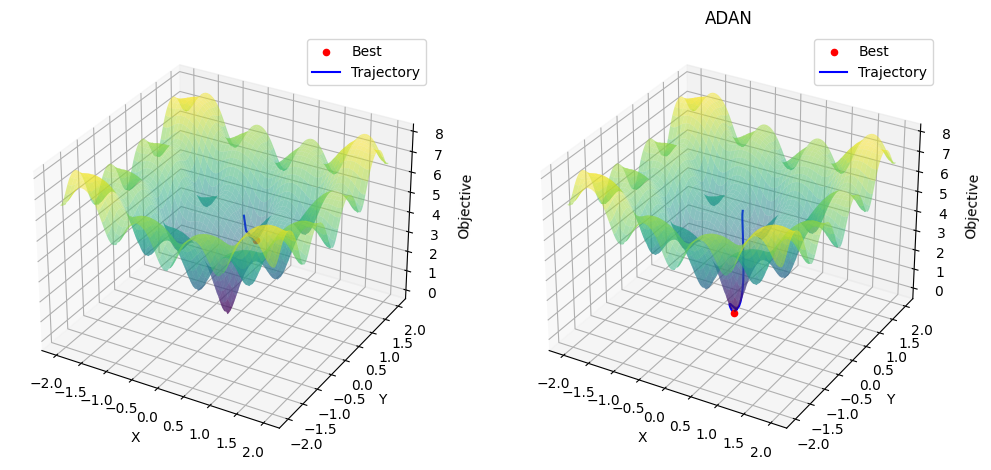

In [215]:
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)

# Plot the optimization trajectory
fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={"projection": "3d"})
ax1 = axes[0]
ax1.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)
ax1.scatter(
    adam_best[0],
    adam_best[1],
    objective(adam_best[0], adam_best[1]),
    color="red",
    label="Best",
)
ax1.plot(
    [point[0] for point in adam_solutions],
    [point[1] for point in adam_solutions],
    adam_scores,
    color="blue",
    label="Trajectory",
)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Objective")
ax2.set_title("ADAM")
ax1.legend()

# Plot the optimization trajectory
ax2 = axes[1]
ax2.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)
ax2.scatter(
    adan_best[0],
    adan_best[1],
    objective(adan_best[0], adan_best[1]),
    color="red",
    label="Best",
)
ax2.plot(
    [point[0] for point in adan_solutions],
    [point[1] for point in adan_solutions],
    adan_scores,
    color="blue",
    label="Trajectory",
)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Objective")
ax2.set_title("ADAN")
ax2.legend()

Text(0.5, 1.0, 'ADAN')

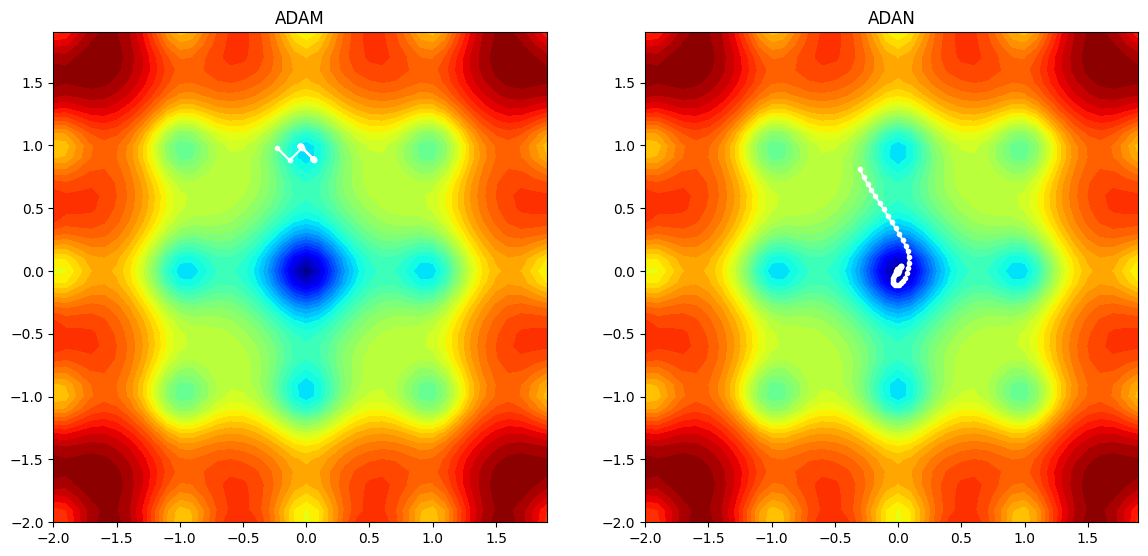

In [216]:
xaxis = arange(bounds[0, 0], bounds[0, 1], 0.1)
yaxis = arange(bounds[1, 0], bounds[1, 1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)

plt.subplots(figsize=(14, 14))
plt.subplot(2, 2, 1)

# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap="jet")
# plot the sample as black circles
adam_solutions = asarray(adam_solutions)
plt.plot(adam_solutions[:, 0], adam_solutions[:, 1], ".-", color="w")
plt.title("ADAM")

plt.subplot(2, 2, 2)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap="jet")
# plot the sample as black circles
adan_solutions = asarray(adan_solutions)
plt.plot(adan_solutions[:, 0], adan_solutions[:, 1], ".-", color="w")
plt.title("ADAN")

Text(0.5, 1.0, 'Convergence in ADAM v/s ADAN')

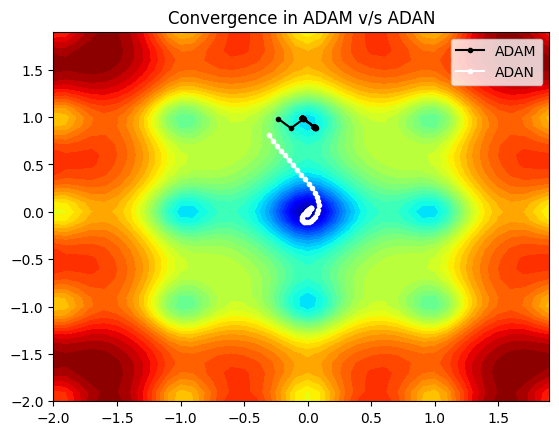

In [217]:
xaxis = arange(bounds[0, 0], bounds[0, 1], 0.1)
yaxis = arange(bounds[1, 0], bounds[1, 1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)

# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap="jet")
# plot the sample as black circles
adam_solutions = asarray(adam_solutions)
plt.plot(adam_solutions[:, 0], adam_solutions[:, 1], ".-", color="black", label = "ADAM")

# plot the sample as black circles
adan_solutions = asarray(adan_solutions)
plt.plot(adan_solutions[:, 0], adan_solutions[:, 1], ".-", color="white", label = "ADAN")
plt.legend()
plt.title("Convergence in ADAM v/s ADAN")

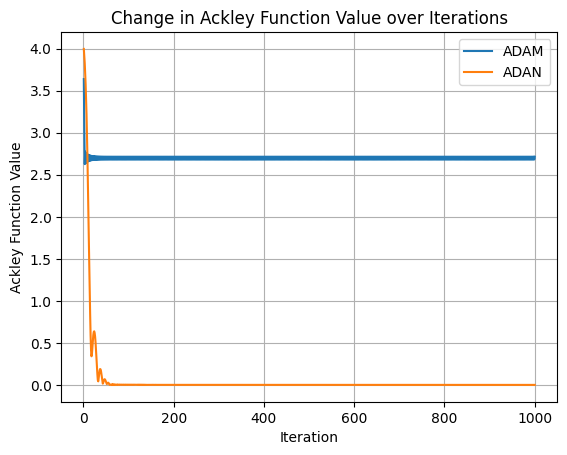

In [218]:
vals = []
for i in range(1000):
    vals.append(objective(adam_solutions[i][0], adam_solutions[i][1]))
plt.plot(range(1, 1001), vals, label="ADAM")

vals = []
for i in range(1000):
    vals.append(objective(adan_solutions[i][0], adan_solutions[i][1]))
plt.plot(range(1, 1001), vals, label="ADAN")

plt.xlabel("Iteration")
plt.ylabel("Ackley Function Value")
plt.title("Change in Ackley Function Value over Iterations")
plt.grid(True)
plt.legend()